<a href="https://colab.research.google.com/github/jaedeokhan/20_1_AI_Introduce/blob/master/pratice/0609TUE_Lab_fashionMNIST_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

FashionMNIST 합성곱 신경망 설계 과제

 - 첨부 ipython 파일 샘플 예제에서 코드 작성

 - 10000개의 테스트 데이터에 대한 정확도 성능 최대치가 되도록 설계

   (기준: 90% 이상)

 

1. 코드 반영 최소 내용

 - FashionMNIST 데이터 샘플 10개 출력되도록 코드 반영

 - 학습 결과인 loss 및 accuracy 그림 도시 반영

 - 훈련 데이터 중 10000개는 validation 데이터셋으로 나누어 성능 튜닝 코드 반영

 

 

2. 실험조건

  - Conv2D/Pooling 조합을 최대 3개까지로 제한 (첨부 샘플에서는 2개로 되어 있음)

  - Flatten() 대신에 GlobalMaxPooling2D 혹은 GlobalAveragePooling2D 사용 가능

 - 각 conv의 최대 특징맵 출력 개수를 64개까지로 제한

 - classifier의 Dense 층의 개수 및 출력 뉴런의 개수는 제한이 없음

 - 네트워크 사이즈, droput 및 regularization, 최적화 방법, 배치 사이즈, 학습률, epochs 등 파라미터 성능 튜닝하여 성능 개선

In [1]:
pip install tensorflow_gpu==2.0.0

In [2]:
pip install keras==2.3.1

In [3]:
import keras
keras.__version__

Using TensorFlow backend.


'2.3.1'

In [4]:
from keras import layers
from keras import models
from keras.datasets import fashion_mnist
from keras.utils import to_categorical
import os
!pwd

/content


In [5]:
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu', padding ='same', input_shape=(28,28,1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(32,(3,3),activation='relu', padding ='same'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu', padding ='same'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 64)          18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 3, 3, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)              

In [0]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

#### 1. FashionMNIST 데이터 샘플 10개 출력되도록 코드 반영 

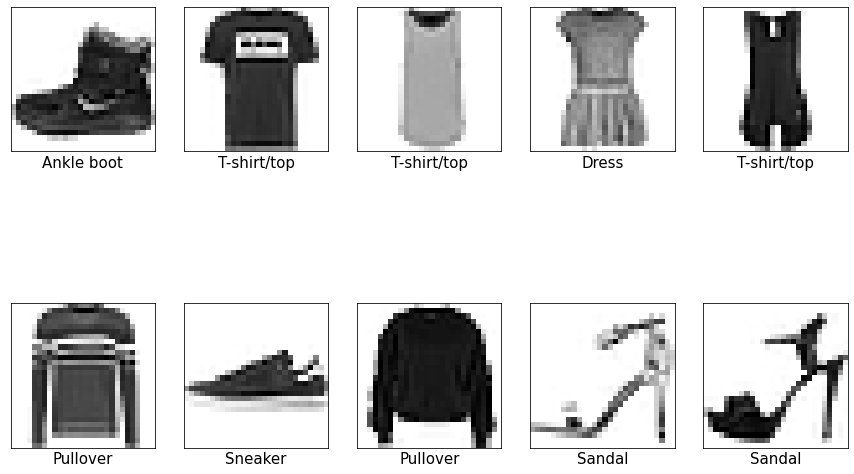

In [7]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
class_name = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
plt.figure(figsize=(15, 10))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.xticks([]) # x축에 눈금을 없애는 역할
    plt.yticks([]) # y축에 눈금을 없애는 역할
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary) # cmap = plt.cm.binary는 흑백
    plt.xlabel(class_name[train_labels[i]], fontsize=15)
plt.show()

In [0]:
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [9]:
x_val = train_images[:10000]
partial_x_train = train_images[10000:]
y_val = train_labels[:10000]
partial_y_train = train_labels[10000:]

print(x_val.shape)
print(partial_x_train.shape)

(10000, 28, 28, 1)
(50000, 28, 28, 1)


In [0]:
model.compile(optimizer='rmsprop',
               loss='categorical_crossentropy',
               metrics=['accuracy'])

In [11]:
history  = model.fit(partial_x_train,
                     partial_y_train,
                     epochs=8,
                     batch_size=64,
                     validation_data=(x_val, y_val))

Train on 50000 samples, validate on 10000 samples
Epoch 1/8
50000/50000 [==============================] - 9s 186us/step - loss: 0.5326 - accuracy: 0.8046 - val_loss: 0.5094 - val_accuracy: 0.8132
Epoch 2/8
50000/50000 [==============================] - 8s 162us/step - loss: 0.3224 - accuracy: 0.8817 - val_loss: 0.2936 - val_accuracy: 0.8903
Epoch 3/8
50000/50000 [==============================] - 8s 162us/step - loss: 0.2730 - accuracy: 0.9007 - val_loss: 0.2741 - val_accuracy: 0.8959
Epoch 4/8
50000/50000 [==============================] - 8s 165us/step - loss: 0.2405 - accuracy: 0.9113 - val_loss: 0.2597 - val_accuracy: 0.9014
Epoch 5/8
50000/50000 [==============================] - 8s 169us/step - loss: 0.2184 - accuracy: 0.9195 - val_loss: 0.2328 - val_accuracy: 0.9147
Epoch 6/8
50000/50000 [==============================] - 8s 169us/step - loss: 0.1987 - accuracy: 0.9264 - val_loss: 0.2614 - val_accuracy: 0.9041
Epoch 7/8
50000/50000 [==============================] - 8s 169us/st

In [12]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

10000/10000 [==============================] - 1s 122us/step


In [13]:
test_acc

0.9150999784469604

#### 2. 학습 결과인 loss & accuracy 그림 도시 반영

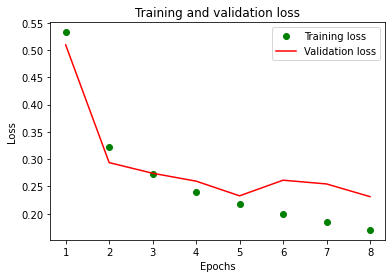

In [17]:
import matplotlib.pyplot as plt

history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'go', label="Training loss")
plt.plot(epochs, val_loss, 'r', label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

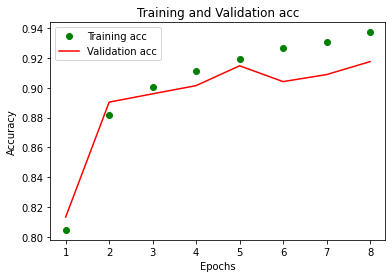

In [18]:
plt.clf()
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

plt.plot(epochs, acc, 'go', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and Validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

* epochs = 5
* batch_size = 32
* Dense 128
   * test_acc = 0.9088

```
# 60000/60000 [==============================] - 14s 237us/step - loss: 0.2109 - accuracy: 0.9232
# test_acc = 0.9088
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu', padding ='same', input_shape=(28,28,1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(32,(3,3),activation='relu', padding ='same'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu', padding ='same'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
```

* 위 코드 그대로 epochs = 10 으로 하니 
   * test_acc=90

* epoch = 20, batch_size = 64
   * test_acc =90
   
```
Epoch 16/20
50000/50000 [==============================] - 8s 156us/step - loss: 0.0982 - accuracy: 0.9642 - val_loss: 0.3489 - val_accuracy: 0.9201
Epoch 17/20
50000/50000 [==============================] - 8s 155us/step - loss: 0.0929 - accuracy: 0.9654 - val_loss: 0.3692 - val_accuracy: 0.9019

test_acc = 90
```

* epochs = 20, batch_size = 128 
   * 성능저하

* 위와 같이, batch_size = 256
   * 성능저하


<!-- ###################################### -->
* Dense 256, batch_size = 64
   * test_acc = 91

```
# train = 92
# test = 91
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu', padding ='same', input_shape=(28,28,1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(32,(3,3),activation='relu', padding ='same'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu', padding ='same'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.summary()

batch_size = 64
```

* 위와 같은 방식으로 epochs = 10
   * test_acc = 91.5


* Dropout 추가 
   * test_acc = 89
   
```
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu', padding ='same', input_shape=(28,28,1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Dropout(0.25))
model.add(layers.Conv2D(32,(3,3),activation='relu', padding ='same'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Dropout(0.25))
model.add(layers.Conv2D(64,(3,3),activation='relu', padding ='same'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Dropout(0.25))
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

model.summary()

Dropout 추가 => test 89
```



```
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu', padding ='same', input_shape=(28,28,1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Dropout(0.25))
model.add(layers.Conv2D(32,(3,3),activation='relu', padding ='same'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Dropout(0.25))
# model.add(layers.Conv2D(64,(3,3),activation='relu', padding ='same'))
# model.add(layers.MaxPooling2D((2,2)))
# model.add(layers.Dropout(0.25))
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

model.summary()

Epoch 8/10
50000/50000 [==============================] - 8s 159us/step - loss: 0.2910 - accuracy: 0.8981 - val_loss: 0.2419 - val_accuracy: 0.9130
Epoch 9/10
50000/50000 [==============================] - 8s 158us/step - loss: 0.2927 - accuracy: 0.8980 - val_loss: 0.2972 - val_accuracy: 0.9110
Epoch 10/10
50000/50000 [==============================] - 8s 159us/step - loss: 0.2880 - accuracy: 0.8995 - val_loss: 0.2861 - val_accuracy: 0.9109

test => 0.9042999744415283
```

```
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu', padding ='same', input_shape=(28,28,1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Dropout(0.25))
model.add(layers.Conv2D(64,(3,3),activation='relu', padding ='same'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Dropout(0.25))
# model.add(layers.Conv2D(64,(3,3),activation='relu', padding ='same'))
# model.add(layers.MaxPooling2D((2,2)))
# model.add(layers.Dropout(0.25))
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

model.summary()

Epoch 1/5
50000/50000 [==============================] - 11s 216us/step - loss: 0.5391 - accuracy: 0.8053 - val_loss: 0.3361 - val_accuracy: 0.8786
Epoch 2/5
50000/50000 [==============================] - 9s 187us/step - loss: 0.3586 - accuracy: 0.8719 - val_loss: 0.3091 - val_accuracy: 0.8925
Epoch 3/5
50000/50000 [==============================] - 9s 186us/step - loss: 0.3184 - accuracy: 0.8845 - val_loss: 0.2952 - val_accuracy: 0.8947
Epoch 4/5
50000/50000 [==============================] - 9s 187us/step - loss: 0.2982 - accuracy: 0.8936 - val_loss: 0.2730 - val_accuracy: 0.9013
Epoch 5/5
50000/50000 [==============================] - 9s 185us/step - loss: 0.2887 - accuracy: 0.8973 - val_loss: 0.2603 - val_accuracy: 0.9095

test_acc => 0.9024999737739563
```

```
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu', padding ='same', input_shape=(28,28,1)))
# model.add(layers.MaxPooling2D((2,2)))
model.add(layers.GlobalMaxPooling2D(2,2))
model.add(layers.Conv2D(32,(3,3),activation='relu', padding ='same'))
# model.add(layers.MaxPooling2D((2,2)))
model.add(layers.GlobalMaxPooling2D(2,2))
model.add(layers.Conv2D(64,(3,3),activation='relu', padding ='same'))
# model.add(layers.MaxPooling2D((2,2)))
model.add(layers.GlobalMaxPooling2D(2,2))
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.summary()

Epoch 6/8
50000/50000 [==============================] - 8s 159us/step - loss: 0.2055 - accuracy: 0.9254 - val_loss: 0.2584 - val_accuracy: 0.9089
Epoch 7/8
50000/50000 [==============================] - 8s 159us/step - loss: 0.1896 - accuracy: 0.9309 - val_loss: 0.2481 - val_accuracy: 0.9119
Epoch 8/8
50000/50000 [==============================] - 8s 158us/step - loss: 0.1768 - accuracy: 0.9345 - val_loss: 0.2681 - val_accuracy: 0.9096

test_acc = 0.9036999940872192
```